<a href="https://colab.research.google.com/github/alifiarahmah/DSCDataScience/blob/main/EksplorasiData_AlifiaRahmah/DSC_2_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Event #2 DSC - Solving Real-World Problems with Data Science
Nama: Alifia Rahmah<br>
NIM: 16520309

### Import module Pandas, NumPy, dan PyPlot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# \#1 - Data Preparation

## Data Collecting
Untuk tugas ini, saya mengambil dataset dari Kaggle, dengan judul "dfies on Netflix, Prime Video, Hulu and Disney+" oleh Ruchi Bhatia.<br>
[Sumber](https://www.kaggle.com/ruchi798/dfies-on-netflix-prime-video-hulu-and-disney)

In [2]:
df = pd.read_csv("movies.csv")

# \#2 - Data Preprocessing

##Data Cleaning

In [3]:
# menghapus kolom Unnamed:0 dan kolom Type karena sepertinya tidak penting
del df['Unnamed: 0']
del df['Type']

In [4]:
# rename kolom
df.columns = ['id', 'title', 'year', 'age', 'imdb', 'rotten', 'netflix', 'hulu', 'prime', 'disney', 'directors', 'genres', 'country', 'lang', 'time']

In [5]:
# hapus last string '+' di age dan '%' di kolom 'rotten'
df['age'] = df['age'].str[:-1]
df['rotten'] = df['rotten'].str[:-1]

In [6]:
# jadiin imdb dan rotten numeric
df['imdb'] = pd.to_numeric(df['imdb'])
df['rotten'] = pd.to_numeric(df['rotten'])

In [7]:
df.head()

,id,title,year,age,imdb,rotten,netflix,hulu,prime,disney,directors,genres,country,lang,time
0,1,Inception,2010,13,8.8,87.0,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18,8.7,87.0,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13,8.5,84.0,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7,8.5,96.0,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18,8.8,97.0,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


# \#3 - Data Observation

###Observasi kolom 'year'

In [103]:
# Mendaftar kemunculan tiap tahun pada data
df['year'].value_counts()

2017    1401
2018    1285
2016    1206
2015    1065
2014     986
        ... 
1924       1
1912       1
1916       1
1917       1
1902       1
Name: year, Length: 109, dtype: int64

In [105]:
print((df['year'].value_counts()).head()) # Tahun paling banyak film rilis + frekuensinya

2017    1401
2018    1285
2016    1206
2015    1065
2014     986
Name: year, dtype: int64


In [112]:
# Ada berapa film yang rilis pada tahun terbaru
print(df.pivot_table(index=['year'],aggfunc='size').tail(1))

# Salah satu judul film yang rilis pada tahun tsb
imax = df['year'].idxmax()
print(df[imax:imax+1])

year
2020    147
dtype: int64
    id                              title  year  ...        country     lang  time
65  66  To All the Boys I've Loved Before  2020  ...  United States  English  99.0

[1 rows x 15 columns]


In [107]:
# Ada berapa film yang rilis pada tahun oldest
print(df.pivot_table(index=['year'],aggfunc='size').head(1))

# Cari judul film yang rilis pada tahun tsb
imin = df['year'].idxmin()
print(df[imin:imin+1])

year
1902    1
dtype: int64
4467
        id               title  year  ... country         lang  time
4467  4468  A Trip to the Moon  1902  ...  France  None,French  13.0

[1 rows x 15 columns]


###Observasi kolom 'age'

In [26]:
# DataFrame film bikin tabel frekuensi kemunculan variasi film dengan umur segitu dengan pivot table
age_freq = df.pivot_table(index=['age'],aggfunc='size')
print(age_freq.head())

age
13    1255
16     320
18    3474
7     1462
al     843
dtype: int64


In [113]:
# judul film yang aman untuk semua umur
ageall = df.loc[df['age'] == 'al']['title']
print(ageall)

54       Willy Wonka & the Chocolate Factory
91                                    Tarzan
125                The Princess and the Frog
133                                   Barfi!
151                                   Swades
                        ...                 
16722                        Secrets of Life
16726           Richie Rich's Christmas Wish
16727        The Jungle Book: Mowgli's Story
16737                        The Bears and I
16738           Whispers: An Elephant's Tale
Name: title, Length: 843, dtype: object


In [118]:
# judul film yang aman untuk anak sampai 7 tahun
age7 = df.loc[df['age'] == '7']['title'].append(ageall)
print(age7)

3                       Back to the Future
5        Spider-Man: Into the Spider-Verse
8                  Raiders of the Lost Ark
14         Monty Python and the Holy Grail
17                           Groundhog Day
                       ...                
16722                      Secrets of Life
16726         Richie Rich's Christmas Wish
16727      The Jungle Book: Mowgli's Story
16737                      The Bears and I
16738         Whispers: An Elephant's Tale
Name: title, Length: 2305, dtype: object


In [119]:
# judul film yang aman untuk anak sampai 13 tahun
age13 = df.loc[df['age'] == '13']['title'].append(age7)
print(age13)

0                                 Inception
2                    Avengers: Infinity War
11                                 3 Idiots
15             Once Upon a Time in the West
16       Indiana Jones and the Last Crusade
                        ...                
16722                       Secrets of Life
16726          Richie Rich's Christmas Wish
16727       The Jungle Book: Mowgli's Story
16737                       The Bears and I
16738          Whispers: An Elephant's Tale
Name: title, Length: 3560, dtype: object


In [120]:
# judul film yang aman untuk anak sampai 16 tahun
age16 = df.loc[df['age'] == '16']['title'].append(age13)
print(age16)

234                     American Factory
246                      The Wolf's Call
249                    The White Helmets
280                The Edge of Democracy
332                          Sour Grapes
                      ...               
16722                    Secrets of Life
16726       Richie Rich's Christmas Wish
16727    The Jungle Book: Mowgli's Story
16737                    The Bears and I
16738       Whispers: An Elephant's Tale
Name: title, Length: 3880, dtype: object


In [115]:
# judul film yang aman untuk anak sampai 18 tahun... ya semuanya
age18 = df
print(age18)

          id                           title  ...                     lang   time
0          1                       Inception  ...  English,Japanese,French  148.0
1          2                      The Matrix  ...                  English  136.0
2          3          Avengers: Infinity War  ...                  English  149.0
3          4              Back to the Future  ...                  English  116.0
4          5  The Good, the Bad and the Ugly  ...                  Italian  161.0
...      ...                             ...  ...                      ...    ...
16739  16740       The Ghosts of Buxley Hall  ...                  English  120.0
16740  16741                  The Poof Point  ...                  English   90.0
16741  16742           Sharks of Lost Island  ...                  English    NaN
16742  16743              Man Among Cheetahs  ...                  English    NaN
16743  16744                In Beaver Valley  ...                  English   32.0

[16744 rows x 1


###Observasi kolom 'imdb' dan 'rotten'

imdb

In [132]:
rate_imdb_max = df['imdb'].max()
rate_imdb_min = df[df['imdb'] != 0]['imdb'].min()
rate_imdb_avg = round(df['imdb'].mean(),2)

In [ ]:
print(rate_imdb_max)
df.loc[df['imdb'] == rate_imdb_max]['title'] # film dengan rating imdb terbesar

In [ ]:
print(rate_imdb_min)
df.loc[df['imdb'] == rate_imdb_min]['title'] # film dengan rating imdb terkecil (kecuali 0 karena 0 diasumsikan unrated)

rotten

In [133]:
rate_rt_max = df['rotten'].max()
rate_rt_min = df[df['rotten'] != 0]['rotten'].min()
rate_rt_avg = round(df['rotten'].mean(),2)
print(rate_rt_avg)

65.43


In [125]:
print(rate_rt_max)
df.loc[df['rotten'] == rate_rt_max]['title'].head() # film dengan rating rotten terbesar (.head() biar yang keliatan 5 aja)

100.0


11                                   3 Idiots
89                              The Dawn Wall
126                                Bad Genius
141    Bill Burr: I'm Sorry You Feel That Way
148                                The Square
Name: title, dtype: object

In [126]:
print(rate_rt_min)
df.loc[df['rotten'] == rate_rt_min]['title'] # film dengan rating rotten terkecil (kecuali 0 karena 0 diasumsikan unrated)

2.0


4208                 Getaway
4257                    Nina
6938      Strange Wilderness
8133    Kickin' It Old Skool
Name: title, dtype: object

korelasi imdb dan rotten

In [127]:
df['imdb'].corr(df['rotten'])  # semakin dekat dengan 1, semakin 2 kolom berbanding lurus

0.6163204883344218

###Observasi kolom 'netflix', 'hulu', 'prime', 'disney'

In [77]:
# Tabel frekuensi layanan streaming
stream = []

# banyak film dari Netflix
stream.append(['Netflix', ((df['netflix'] == 1).sum())])
# banyak film dari Hulu
stream.append(['Hulu', ((df['hulu'] == 1).sum())])
# banyak film dari Prime
stream.append(['Prime', ((df['prime'] == 1).sum())])
# banyak film dari Disney+
stream.append(['Disney+', ((df['disney'] == 1).sum())])

stream = pd.DataFrame(data=stream)

print(stream)

         0      1
0  Netflix   3560
1     Hulu    903
2    Prime  12354
3  Disney+    564


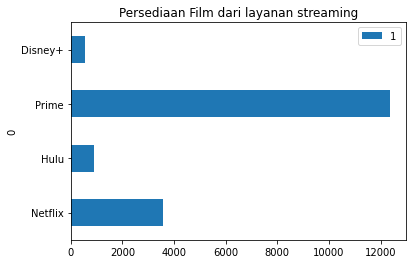

In [85]:
stream.plot(kind="barh", x=0, y=1, title="Persediaan Film dari layanan streaming")

###Observasi kolom 'time'

In [100]:
max_time = df['time'].max()             # durasi film terlama
min_time = df['time'].min()             # durasi film tersingkat
avg_time = round(df['time'].mean(),2)   # rata-rata durasi film

In [101]:
df.loc[df['time'] == max_time] # film dengan durasi terlama

,id,title,year,age,imdb,rotten,netflix,hulu,prime,disney,directors,genres,country,lang,time
13179,13180,Colorado,1940,al,5.9,NaN,0,0,1,0,NaN,"Action,Adventure,Drama,Romance,Western",United States,English,1256.0


In [102]:
df.loc[df['time'] == min_time] # film dengan durasi tersingkat

,id,title,year,age,imdb,rotten,netflix,hulu,prime,disney,directors,genres,country,lang,time
2626,2627,Liefling The Movie,2010,NaN,6.3,NaN,1,0,0,0,Kendrick Hew,"Short,Thriller",Canada,English,1.0


In [134]:
print(avg_time)

93.41


#Insight

##Informasi seputar tahun rilis film
Dari hasil observasi kolom 'year'.
1. Tahun 2017 merupakan tahun banyak film rilis, yaitu sebesar 1401 film. diikuti tahun 2018 sebanyak 1285 film, 2016 sebanyak 1206 film, 2015 sebanyak 1065 film, dan 2014 sebanyak 986 film.
Range tahun 2014-2018 dapat disimpulkan menjadi masa produktif dalam pembuatan film.
2. Pada tahun terbaru pembuatan film (di dataset ini), yaitu tahun 2020, terdapat 147 film yang rilis. salah satunya "*To All the Boys I've Loved Before*".
3. Film tertua yang terekam di dataset ini merupakan film keluaran 1902, dengan judul "*A Trip to the Moon*".

##Informasi seputar tentang umur aman menonton film
Dari hasil observasi kolom 'age'.<br>
Rentang umur tertentu dikatakan aman untuk menonton film jika umur tersebut masuk dalam keterangan batas umur pada label film, atau berada di atas keterangan batas umur pada label film tersebut.<br>
Berdasarkan tabel frekuensi yang telah dibuat pada bagian "Observasi kolom 'year'", didapatkan:
1. Terdapat 843 film yang dapat ditonton semua umur, termasuk anak di bawah 7 tahun.
2. Terdapat 2305 film yang dapat ditonton hingga usia di bawah 13 tahun.
3. Terdapat 3880 film yang dapat ditonton hingga usia di bawah 18 tahun.
4. Terdapat 3474 film yang hanya dapat ditonton usia 18 tahun ke atas.

##Informasi seputar rating film
Dari hasil observasi kolom 'imdb' dan 'rotten'.
1. Rating IMDB terbesar yang diraih pada dataset ini adalah 9.3, yang diraih oleh "*My Next Guest with David Letterman and Shah Rukh Khan*", "*Love on a Leash*", "*Square One*", "*Steven Banks: Home Entertainment Center*", "*Down, But Not Out!*", dan "*Bounty*".
2. Rating IMDB terkecil yang diraih pada dataset ini adalah 1.0, yang diraih oleh "*Justin Bieber: Rise to Fame*" dan "*Justin Bieber: Always Believing*". Rating IMDB terkecil ini tidak termasuk rating 0, dikarenakan rating 0 dapat diasumsikan belum mendapat rating (*unrated*).
3. Rata-rata rating IMDB yang diraih pada dataset ini adalah 5.9
4. Rating RottenTomatoes terbesar yang diraih pada dataset ini adalah 100%, yang diraih oleh "*3 Idiots*", "*The Dawn Wall*", "*Bad Genius*", "*Bill Burr: I'm Sorry You Feel That Way*", dan "*The Square*".
5. Rating RottenTomatoes terkecil yang diraih pada dataset ini adalah 2%, yang diraih oleh "*Getaway*", "*Nina*", "*Strange Wilderness*", dan "*Kickin' It Old Skool*". tidak termasuk rating 0, dikarenakan rating 0 dapat diasumsikan belum mendapat rating (unrated).
6. Rata-rata rating RottenTomatoes yang diraih pada dataset ini adalah 65.43%
7. Koefisien korelasi antara rating IMDB dan RottenTomatoes sebesar 0.616. karena angka ini mendekat ke 1, dapat dibilang rating IMDB suatu film sebagian besar berbanding lurus dengan rating RottenTomatoes dari film tersebut.

##Informasi seputar layanan streaming film
Dari hasil observasi kolom 'netflix', 'hulu', 'prime', 'disney'.<br>
Dari visualisasi data dalam bentuk bar, dapat diketahui film paling banyak terdapat pada Prime Video dengan persediaan film mencapai 12354, diikuti Netflix dengan persediaan film mencapai 3560. Lalu sisanya Hulu dengan persediaan mencapai 903 film, dan Disney+, yang memiliki persediaan film paling sedikit berdasar dataset ini, dengan persediaan mencapai 564 film.
##Informasi seputar durasi film
Dari hasil observasi kolom 'time'
1. Durasi terlama film pada dataset ini, yaitu selama 1256 menit (sekitar 20.93 jam), terdapat pada film "*Colorado*".
2. Durasi tersingkat film pada dataset ini, yaitu selama 1 menit, terdapat pada film "*Liefling The Movie*".
3. Rata-rata durasi film berlangsung adalah sebesra 93.41 menit, atau sekitar 1.6 jam.